In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [5]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [7]:
df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [8]:
pd.crosstab(df["Age"], df["CGPA"])

CGPA,5,6,7,8,9
Age,,,,,
19,2,37,52,58,7
20,10,97,119,120,29
21,25,274,352,361,72
22,24,280,297,291,49
23,22,65,60,46,2
24,13,51,43,22,2
25,0,9,12,7,1
26,0,20,21,6,3
28,0,1,0,2,0


In [9]:
df_cols = df.columns

In [10]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [11]:
cat_cols = df.select_dtypes("O").keys()
cat_cols

Index(['Gender', 'Stream'], dtype='object')

In [12]:
value = df["Gender"].value_counts().keys()
value

Index(['Male', 'Female'], dtype='object')

In [13]:
value1 = df["Stream"].value_counts().keys()
value1

Index(['Computer Science', 'Information Technology',
       'Electronics And Communication', 'Mechanical', 'Electrical', 'Civil'],
      dtype='object')

In [14]:
for num, var in enumerate(value):
    num+=1
    print(num)
    df["Gender"].replace(var, num, inplace=True)

1
2


In [15]:
for num, var in enumerate(value1):
    num+=1
    print(num)
    df["Stream"].replace(var, num, inplace=True)

1
2
3
4
5
6


In [16]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,2,1,0,7,1,1,1
2,22,2,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,4,0,8,1,0,1


In [17]:
df["Stream"].value_counts().keys()

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

In [18]:
df["Gender"].value_counts().keys()

Int64Index([1, 2], dtype='int64')

In [19]:
df.corr()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.021538,-0.045965,0.006552,-0.119787,0.003042,-0.042586,0.046943
Gender,0.021538,1.000000,-0.105088,0.081526,0.003512,0.200254,-0.026153,0.006705
Stream,-0.045965,-0.105088,1.000000,-0.155781,0.015072,0.159892,0.032266,-0.081611
Internships,0.006552,0.081526,-0.155781,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.003512,0.015072,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.200254,0.159892,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.026153,0.032266,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.006705,-0.081611,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [20]:
df.describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,1.165543,2.932569,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,1.682618,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,3.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,4.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,2.000000,6.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [22]:
for var in df_cols:
    print(df[var].value_counts())

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64
1    2475
2     491
Name: Gender, dtype: int64
1    776
2    691
3    424
4    424
5    334
6    317
Name: Stream, dtype: int64
0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64
7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64
0    2168
1     798
Name: Hostel, dtype: int64
0    2396
1     570
Name: HistoryOfBacklogs, dtype: int64
1    1639
0    1327
Name: PlacedOrNot, dtype: int64


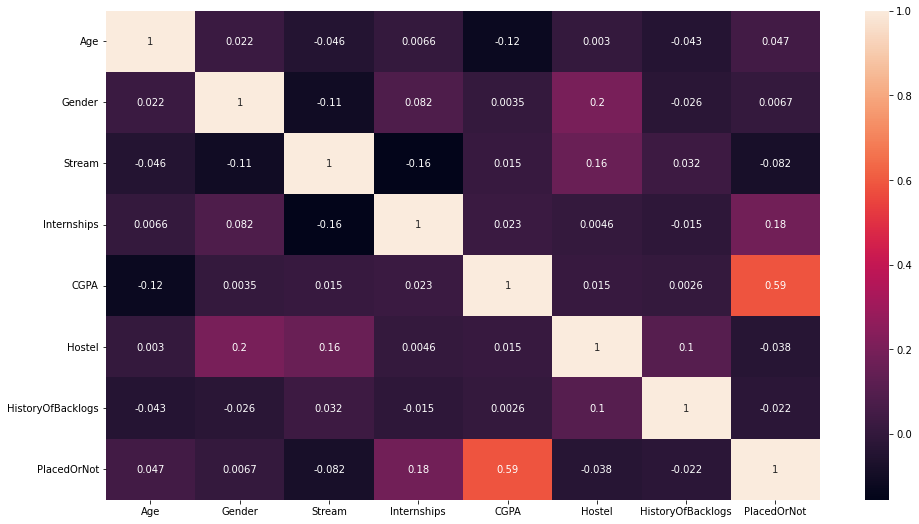

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

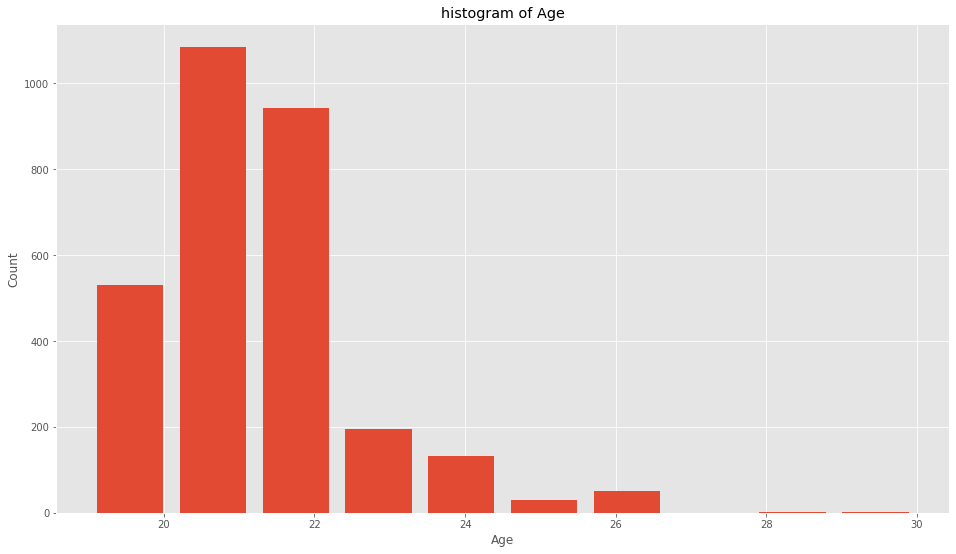

In [25]:
from matplotlib import style
plt.figure(figsize=(16,9))
style.use("ggplot")
plt.hist(df["Age"], rwidth=0.8)
plt.title("histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

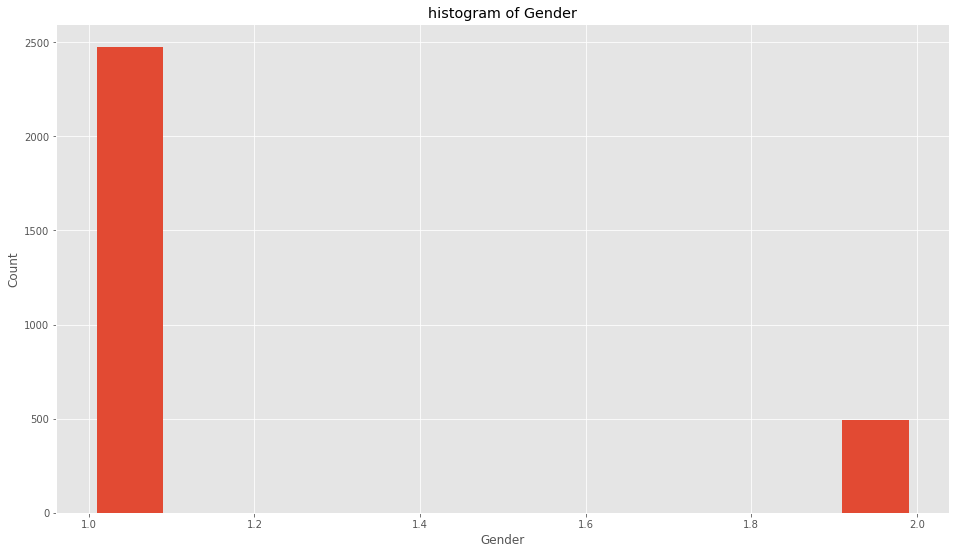

In [26]:
from matplotlib import style
plt.figure(figsize=(16,9))
style.use("ggplot")
plt.hist(df["Gender"], rwidth=0.8)
plt.title("histogram of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

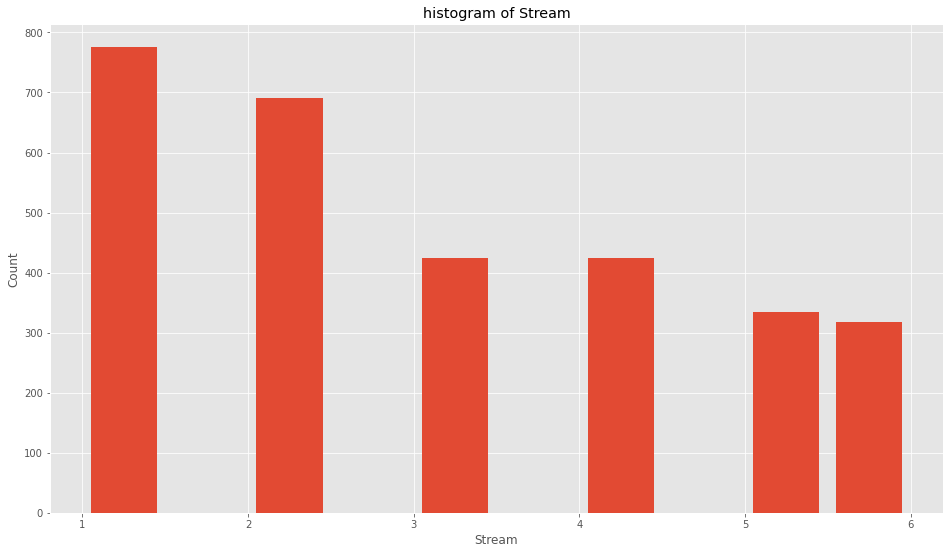

In [27]:
from matplotlib import style
plt.figure(figsize=(16,9))
style.use("ggplot")
plt.hist(df["Stream"], rwidth=0.8)
plt.title("histogram of Stream")
plt.xlabel("Stream")
plt.ylabel("Count")
plt.show()

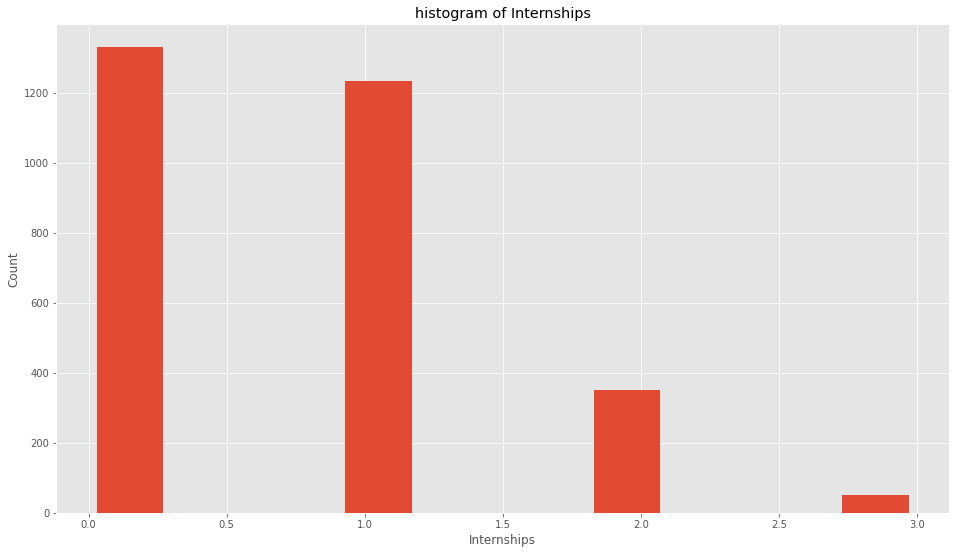

In [28]:
from matplotlib import style
plt.figure(figsize=(16,9))
style.use("ggplot")
plt.hist(df["Internships"], rwidth=0.8)
plt.title("histogram of Internships")
plt.xlabel("Internships")
plt.ylabel("Count")
plt.show()

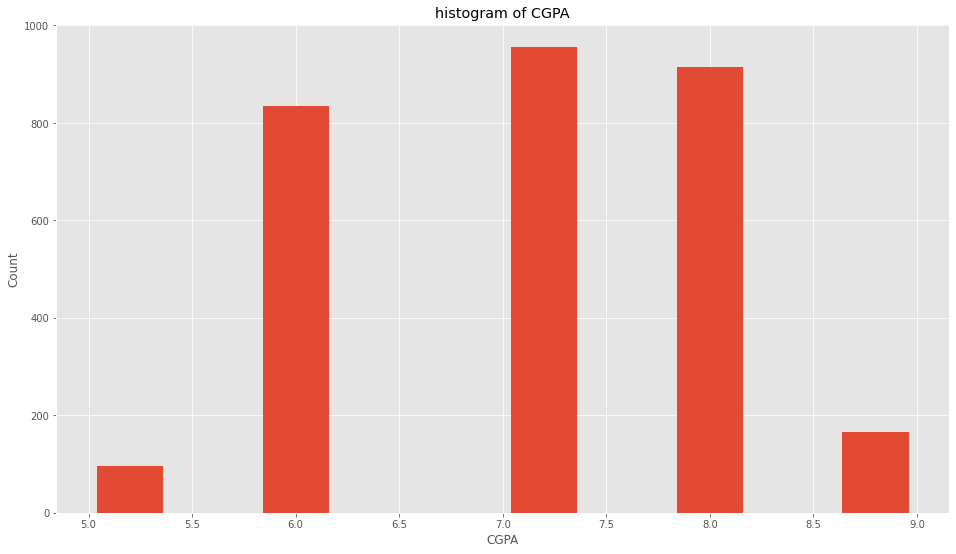

In [29]:
from matplotlib import style
plt.figure(figsize=(16,9))
style.use("ggplot")
plt.hist(df["CGPA"], rwidth=0.8)
plt.title("histogram of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Count")
plt.show()

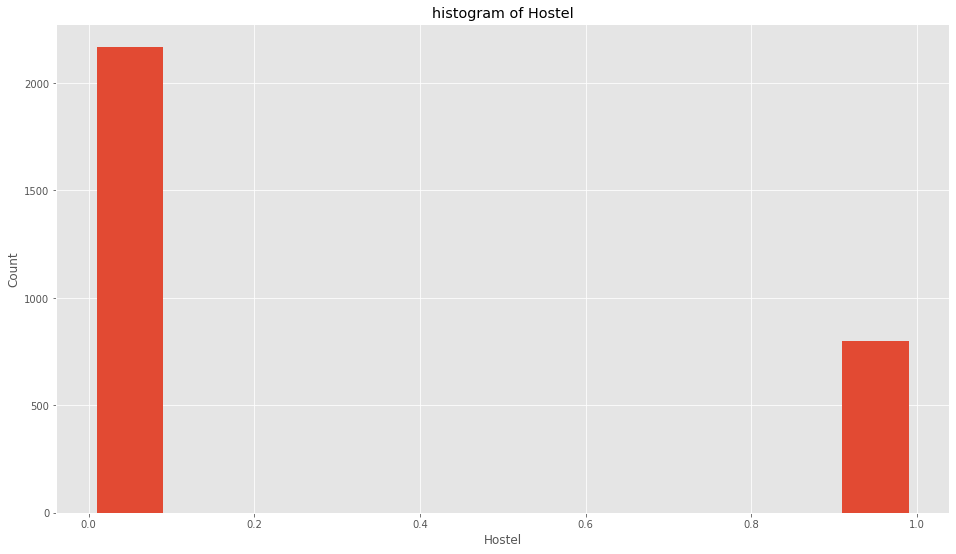

In [30]:
from matplotlib import style
plt.figure(figsize=(16,9))
style.use("ggplot")
plt.hist(df["Hostel"], rwidth=0.8)
plt.title("histogram of Hostel")
plt.xlabel("Hostel")
plt.ylabel("Count")
plt.show()

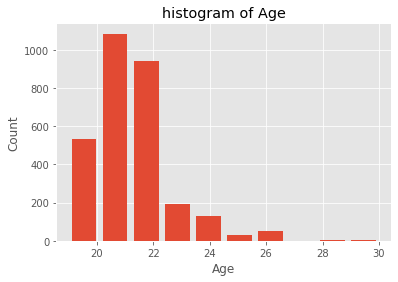

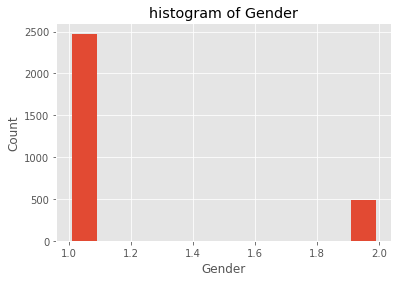

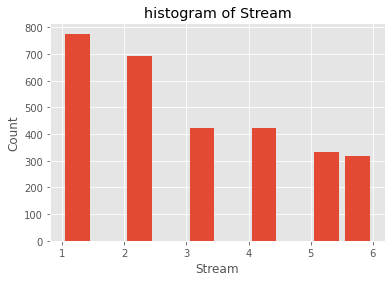

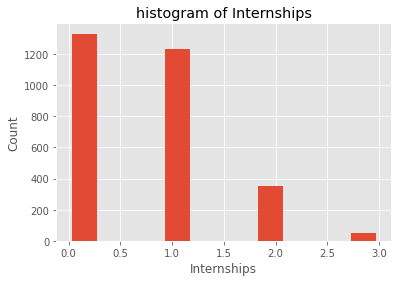

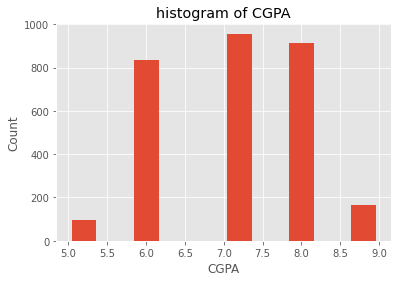

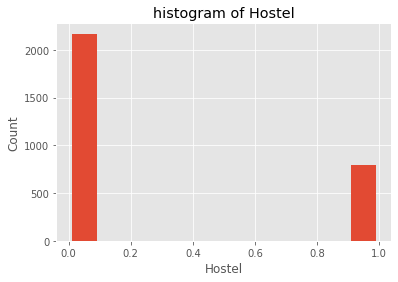

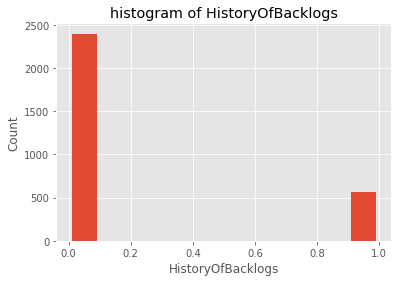

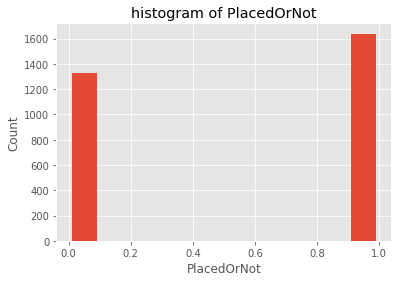

In [31]:
for var in df_cols:
    plt.hist(df[var], rwidth=0.8)
    plt.title(f"histogram of {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Count")
    plt.show()

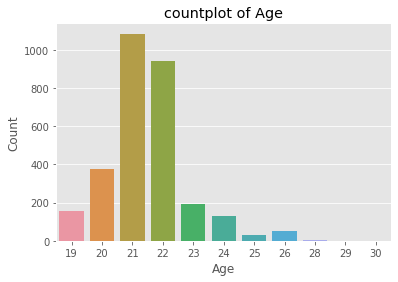

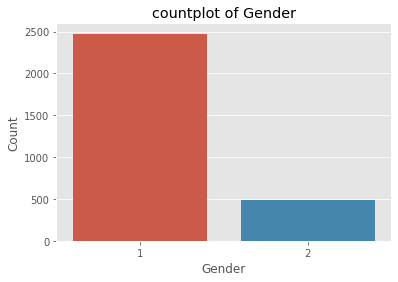

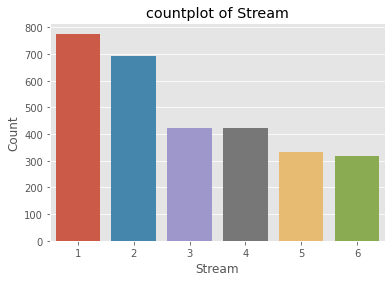

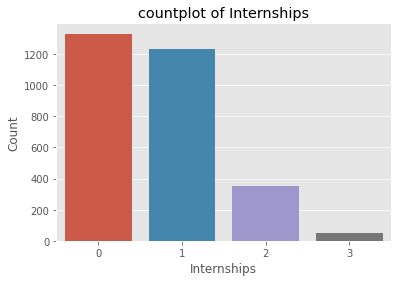

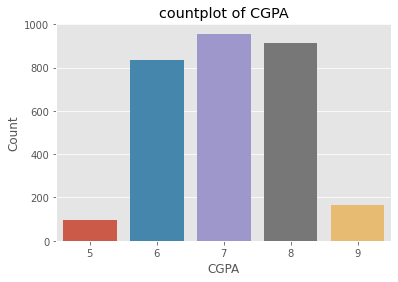

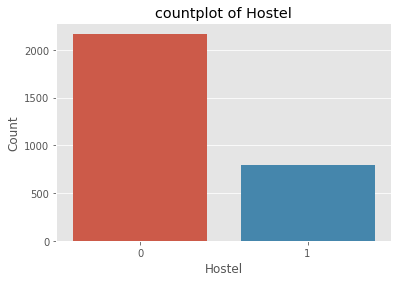

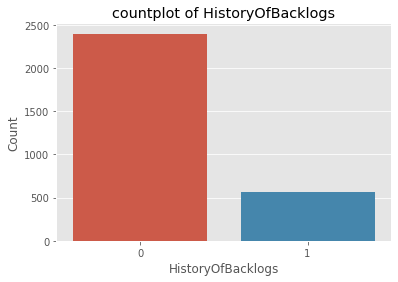

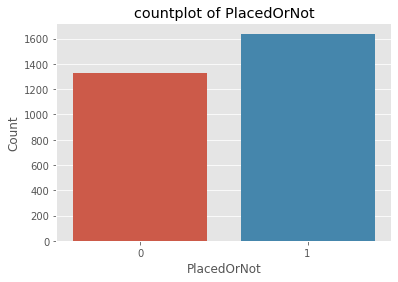

In [32]:
for var in df_cols:
    sns.countplot(df[var])
    plt.title(f"countplot of {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Count")
    plt.show()

In [33]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

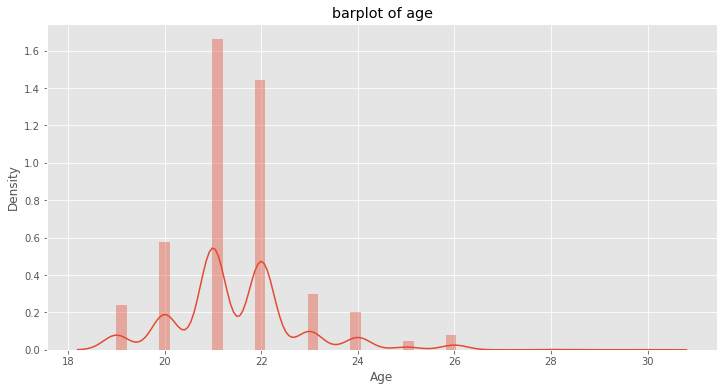

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'])
plt.title("barplot of age")
plt.show()

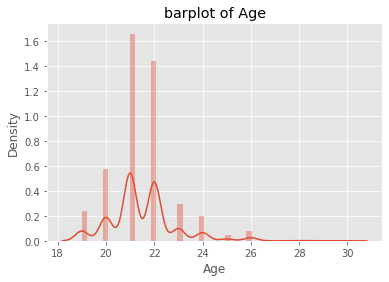

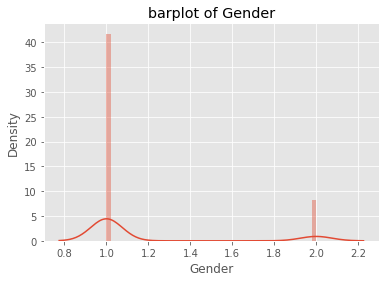

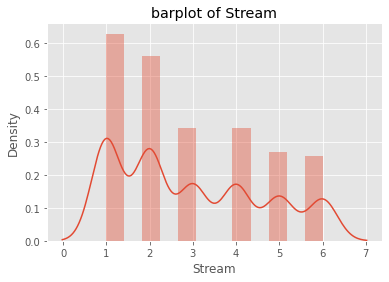

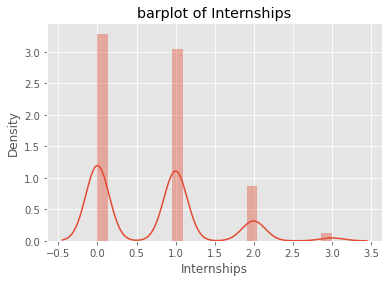

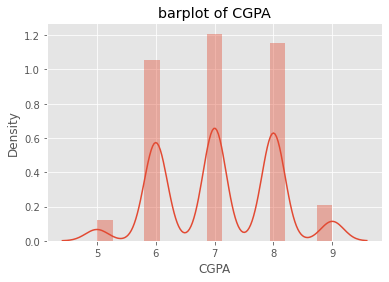

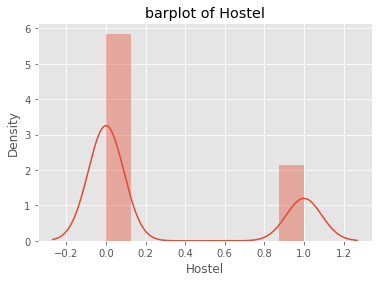

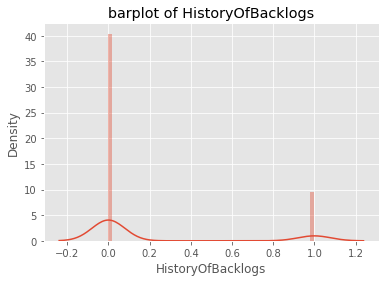

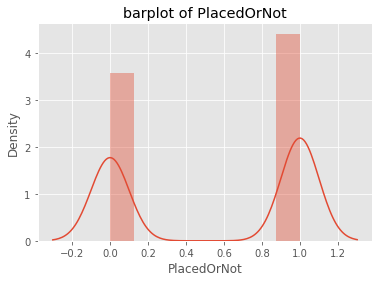

In [35]:
for var in df_cols:
    sns.distplot(df[var])
    plt.title(f"barplot of {var}")
    plt.show()

In [36]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

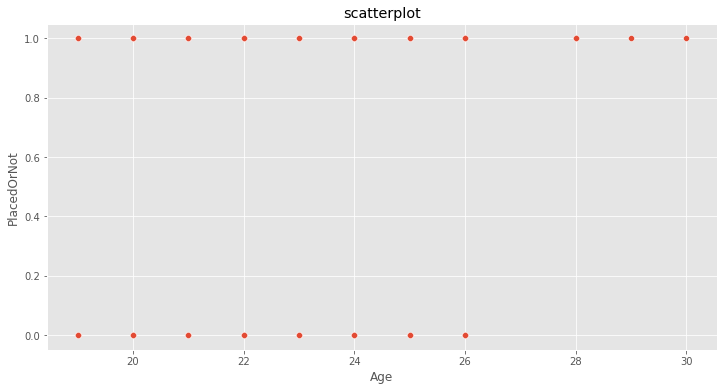

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Age'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

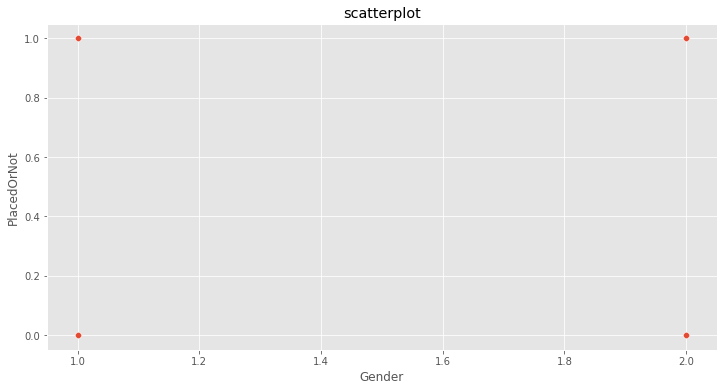

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Gender'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

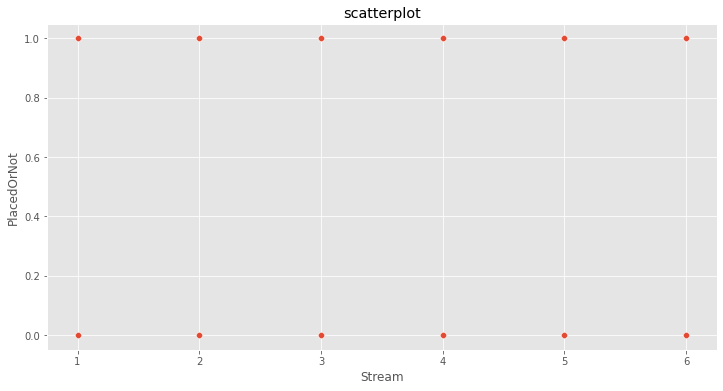

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Stream'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

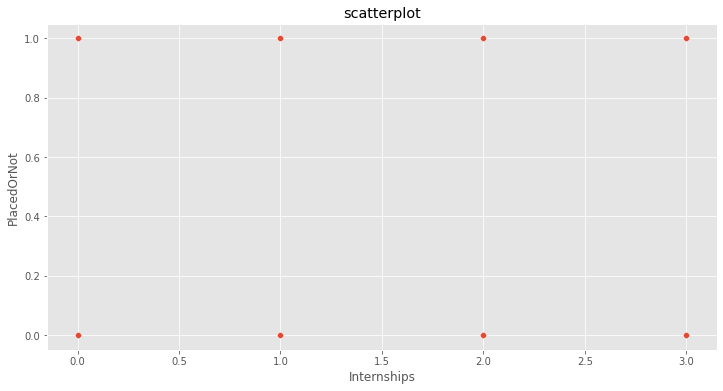

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Internships'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

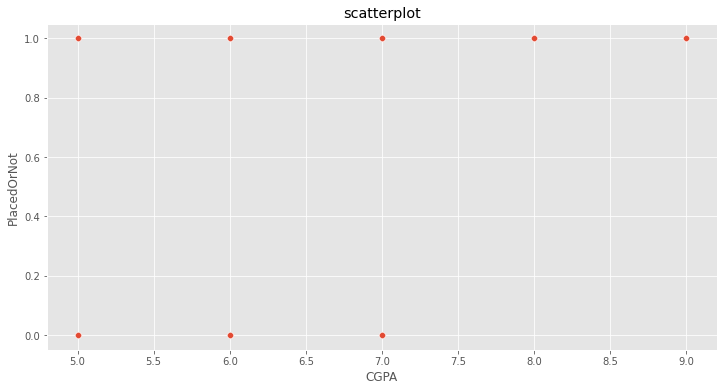

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['CGPA'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

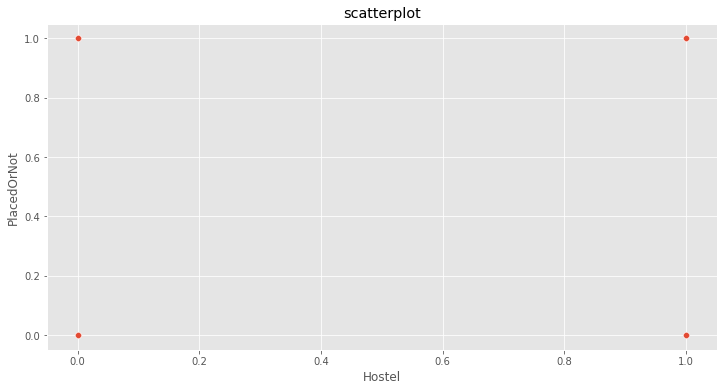

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Hostel'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

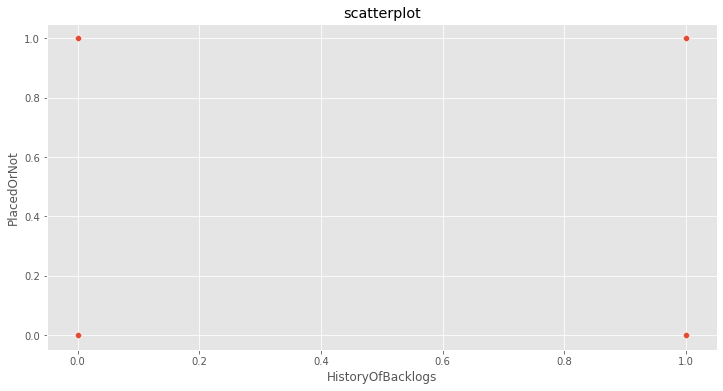

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['HistoryOfBacklogs'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

In [44]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

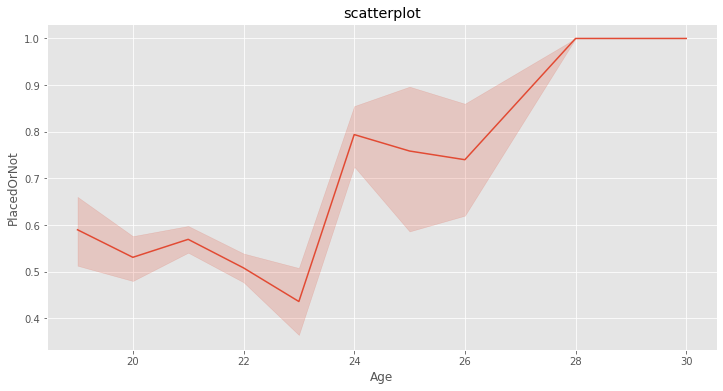

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(df['Age'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

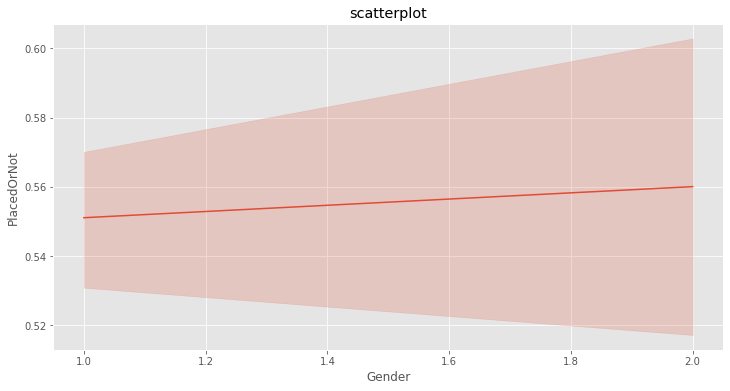

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(df['Gender'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

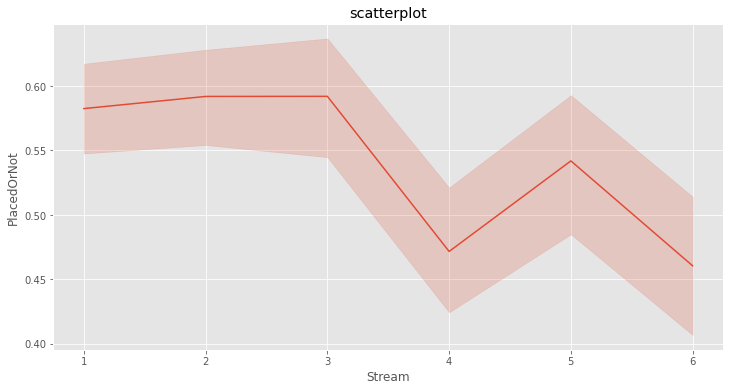

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(df['Stream'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

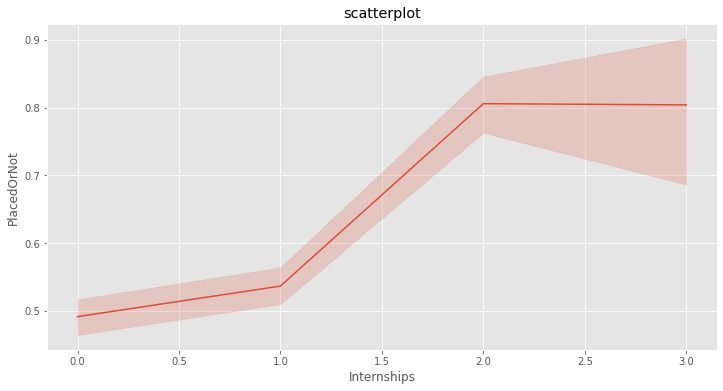

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(df['Internships'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

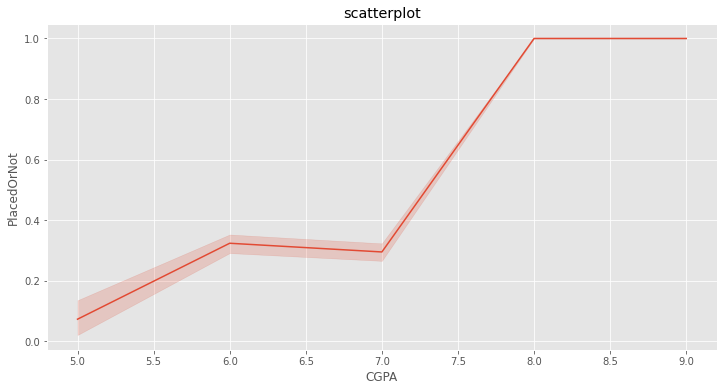

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(df['CGPA'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

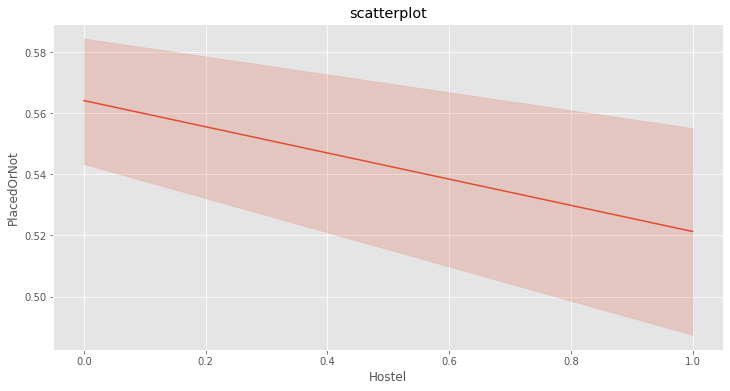

In [50]:
plt.figure(figsize=(12,6))
sns.lineplot(df['Hostel'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

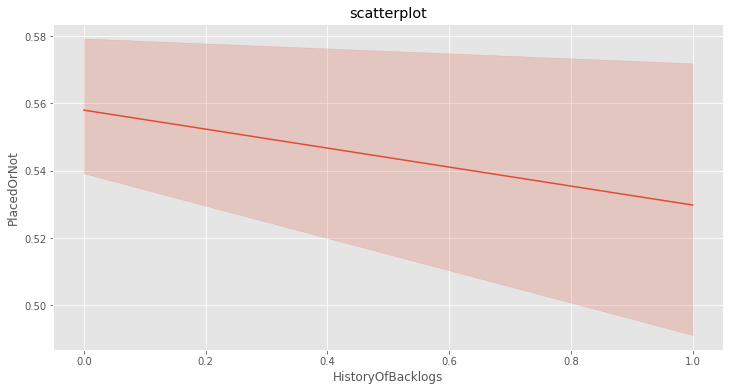

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(df['HistoryOfBacklogs'], df["PlacedOrNot"])
plt.title("scatterplot")
plt.show()

<Figure size 1800x1800 with 0 Axes>

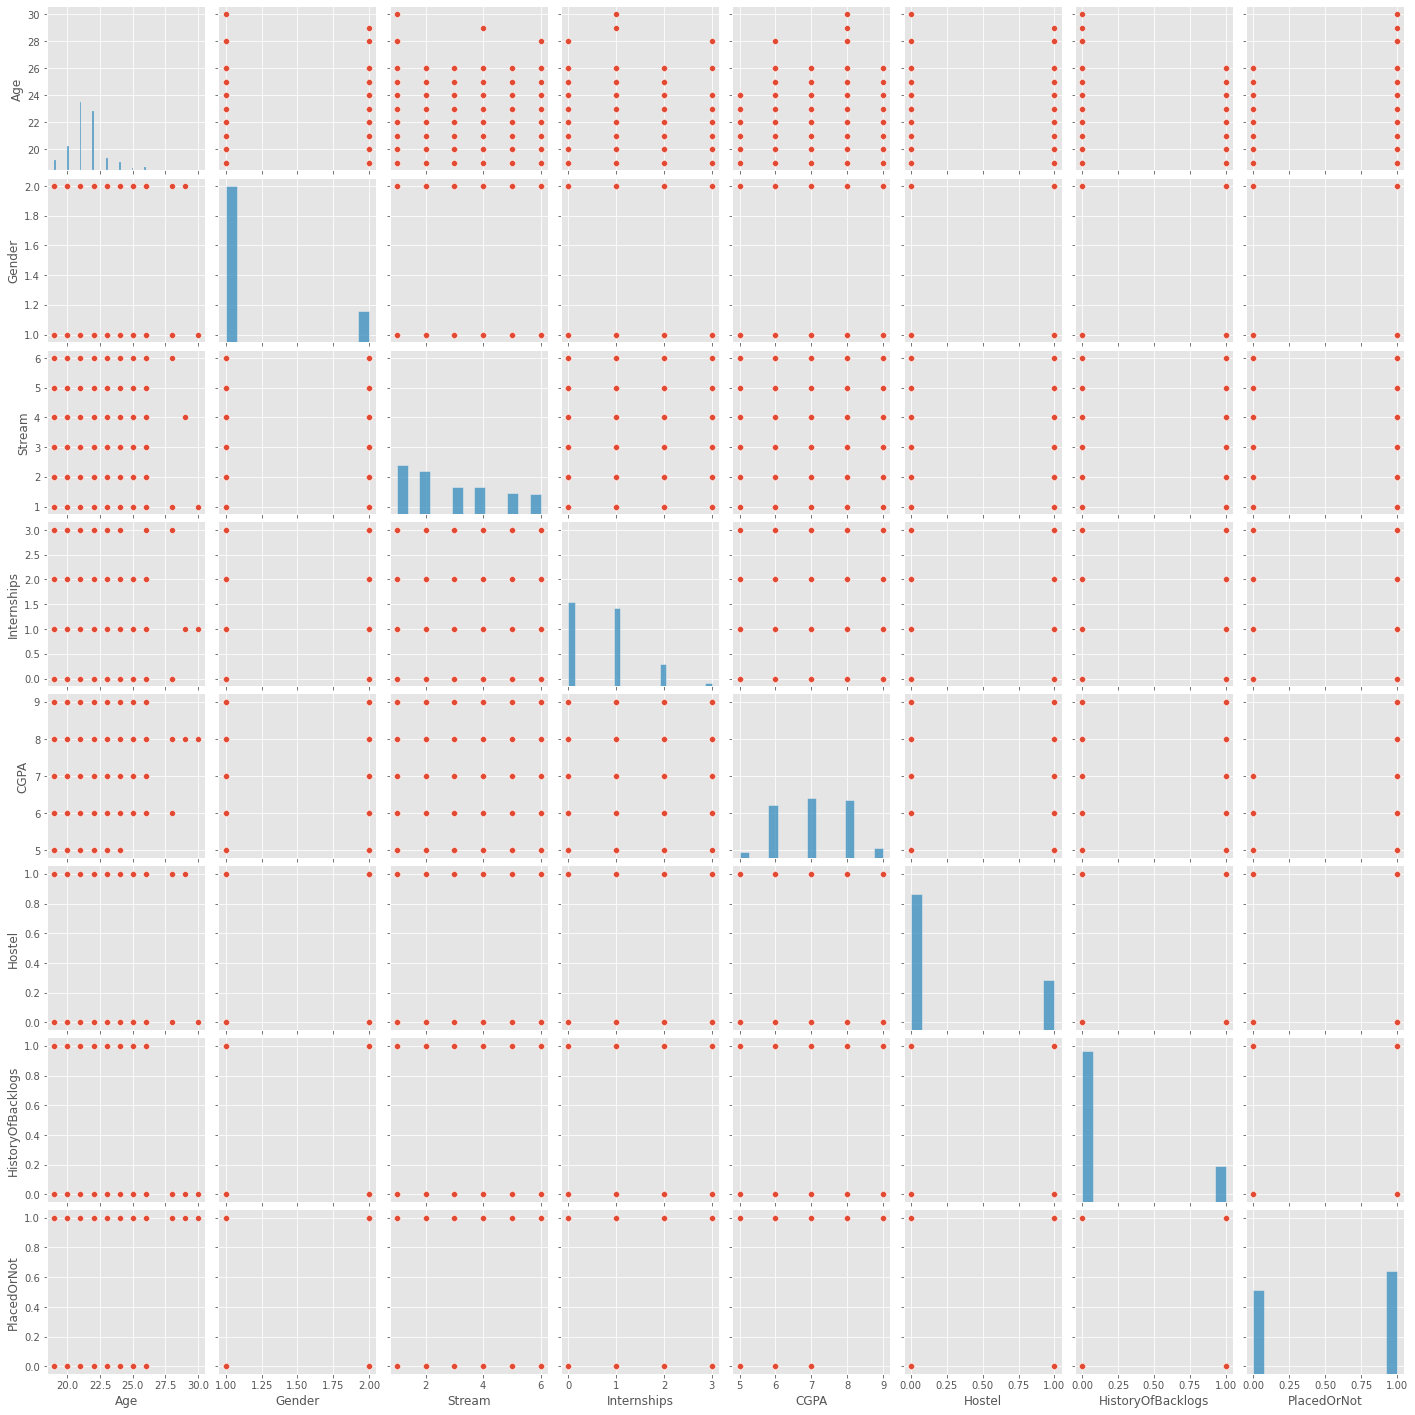

In [52]:
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

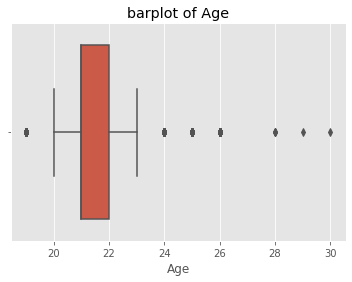

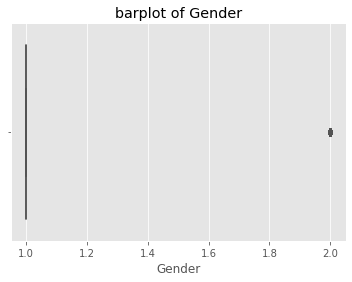

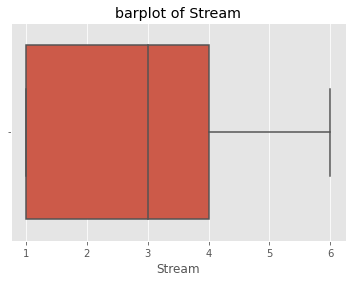

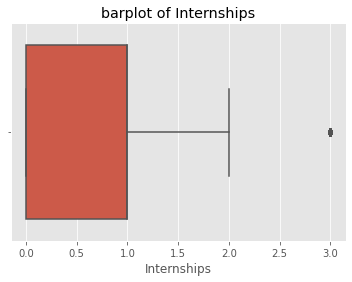

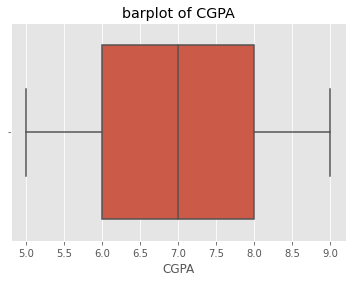

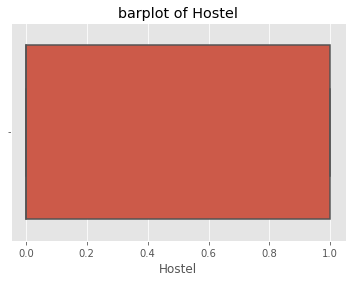

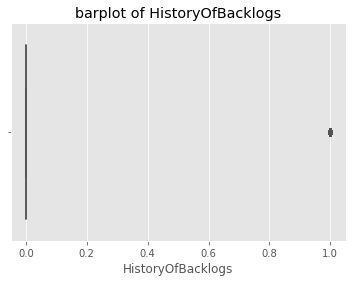

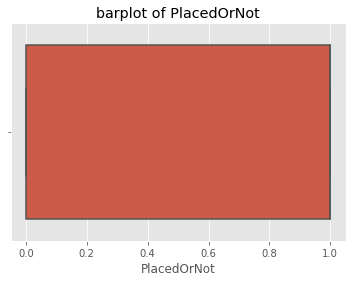

In [53]:
for var in df_cols:
    sns.boxplot(df[var])
    plt.title(f"barplot of {var}")
    plt.show()

In [54]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[PlacedOrNot]'>,
        <AxesSubplot:title={'center':'CGPA'}, xlabel='[PlacedOrNot]'>,
        <AxesSubplot:title={'center':'Gender'}, xlabel='[PlacedOrNot]'>],
       [<AxesSubplot:title={'center':'HistoryOfBacklogs'}, xlabel='[PlacedOrNot]'>,
        <AxesSubplot:title={'center':'Hostel'}, xlabel='[PlacedOrNot]'>,
        <AxesSubplot:title={'center':'Internships'}, xlabel='[PlacedOrNot]'>],
       [<AxesSubplot:title={'center':'Stream'}, xlabel='[PlacedOrNot]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

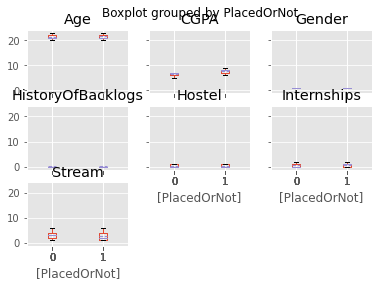

In [55]:
a1=df[['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot']]
a1.boxplot(by = 'PlacedOrNot', meanline=True, showmeans=True, showcaps=True, showbox=True,            
                 showfliers=False)

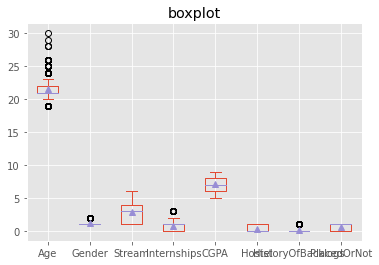

In [56]:
a1.plot(kind='box', title='boxplot', showmeans=True)
plt.show()

In [57]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [58]:
X = df.drop("PlacedOrNot", axis=1)
y = df["PlacedOrNot"]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=123)

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7811447811447811

In [87]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8518518518518519

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8872053872053872

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8838383838383839

In [90]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred4 = ada.predict(X_test)
accuracy_score(y_test, y_pred4)

0.8787878787878788

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
y_pred5 = gbr.predict(X_test)
accuracy_score(y_test, y_pred5)

0.8821548821548821

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred6 = knc.predict(X_test)
accuracy_score(y_test, y_pred6)

0.8501683501683501

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred7 = gnb.predict(X_test)
accuracy_score(y_test, y_pred7)

0.82996632996633

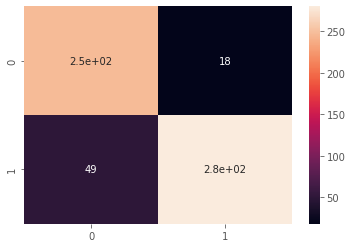

[[247  18]
 [ 49 280]]


In [94]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True)
plt.show()
print(cm)

In [95]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       265
           1       0.94      0.85      0.89       329

    accuracy                           0.89       594
   macro avg       0.89      0.89      0.89       594
weighted avg       0.89      0.89      0.89       594



In [96]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(dtc, X_train, y_train, cv=10)
cv, cv.mean()

(array([0.87394958, 0.90336134, 0.89029536, 0.8649789 , 0.86075949,
        0.88185654, 0.88607595, 0.88185654, 0.8649789 , 0.86919831]),
 0.8777310924369747)

In [97]:
value

Index(['Male', 'Female'], dtype='object')

In [98]:
value1

Index(['Computer Science', 'Information Technology',
       'Electronics And Communication', 'Mechanical', 'Electrical', 'Civil'],
      dtype='object')

In [99]:
df_cols

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [100]:
def placement_student_classifie(model,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs):
    for num,var in enumerate(value):
        if var == Gender:
            Gender = num
    for num1,var1 in enumerate(value1):
        if var1 == Stream:
            Stream = num1
            
            
    x = np.zeros(len(X.columns))
    x[0] = Age
    x[1] = Gender
    x[2] = Stream
    x[3] = Internships
    x[4] = CGPA
    x[5] = Hostel
    x[6] = HistoryOfBacklogs
    
    x = sc.transform([x])[0]
    return model.predict([x])[0]

In [101]:
import joblib

In [102]:
joblib.dump(dtc, "placement_student_classifie.pkl")

['placement_student_classifie.pkl']

In [103]:
model = joblib.load("placement_student_classifie.pkl")

In [108]:
ans = placement_student_classifie(model, Age=35,Gender="Female",Stream="Electrical",Internships=0,CGPA=6.2,Hostel=0,HistoryOfBacklogs=1)
ans

1